In [201]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from tqdm import tqdm
digits = datasets.load_digits()

In [202]:
digits["data"][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [203]:
digits["images"][0][0,0]

0.0

In [204]:
digits["DESCR"]

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [205]:

def sigmoid(x, alpha):
  
    z = np.exp(-x+alpha)
    sig = 1 / (1 + z)

    return sig

def perturb(prob):
    if np.random.uniform(0,1)<prob:
        return np.random.choice(np.arange(17.))
    else:
        return -1

def bright(prob):
    if np.random.uniform(0,1)<prob:
        return 0.0
    else:
        return -1

def dark(prob):
    if np.random.uniform(0,1)<prob:
        return 16.0
    else:
        return -1

def probability(image, position, alpha):
    strength = 0
    for i, row in enumerate(image):
        for j, pixel in enumerate(row):
            if i == position[0] and j == position[1]:
                continue
            strength += pixel/np.linalg.norm(np.array(position)-np.array([i,j]))
    #print(sigmoid(strength, alpha))
    return sigmoid(strength, alpha)

In [206]:
def data_remover(image, alpha, function):
    num_removed = 0
    for i, row in enumerate(image):
        for j, pixel in enumerate(row):
            prob = probability(image, [i,j], alpha)
            new_val =  function(prob)
            if new_val != -1:
                num_removed +=1
                image[i,j] = new_val
            
    return num_removed

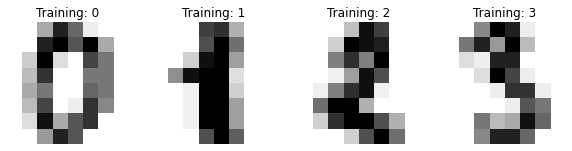

In [207]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [208]:
removed = 0
for im in tqdm(digits["images"]):
    #removed += data_remover(im, 150, perturb)
    removed += data_remover(im, 135, dark)
    #removed += data_remover(im, 0, perturb)

100%|██████████| 1797/1797 [00:46<00:00, 38.60it/s]


In [209]:
removed

46927

In [210]:
len(digits["images"])*64

115008

In [211]:
pixel_num = (removed/(len(digits["images"])*64))*100
print(f"{pixel_num} percent removed", )

40.80324846967168 percent removed


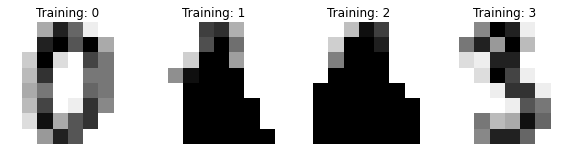

In [212]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [ ]:
#Remove 80, 50, 20, 10, and 5 percent of random digits